# **Analytics Vidhya Innoplexus Hackathon 2019**

Sentiment Analysis in Python with sklearn package

# https://satya-python.blogspot.com/

Jupyter Notebook in Google Colab


In [0]:
#Importing required packages
import numpy as np
import pandas as pd
import seaborn as sns
import re

from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer, HashingVectorizer, TfidfTransformer
from sklearn.model_selection import GridSearchCV

from google.colab import files

import warnings
warnings.filterwarnings('ignore')

## Reading Data

In [0]:
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

## EDA - Exploratory Data Analysis

In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5279 entries, 0 to 5278
Data columns (total 4 columns):
unique_hash    5279 non-null object
text           5279 non-null object
drug           5279 non-null object
sentiment      5279 non-null int64
dtypes: int64(1), object(3)
memory usage: 165.0+ KB


In [6]:
train.head(10)

,unique_hash,text,drug,sentiment
0,2e180be4c9214c1f5ab51fd8cc32bc80c9f612e0,Autoimmune diseases tend to come in clusters. ...,gilenya,2
1,9eba8f80e7e20f3a2f48685530748fbfa95943e4,I can completely understand why you’d want to ...,gilenya,2
2,fe809672251f6bd0d986e00380f48d047c7e7b76,Interesting that it only targets S1P-1/5 recep...,fingolimod,2
3,bd22104dfa9ec80db4099523e03fae7a52735eb6,"Very interesting, grand merci. Now I wonder wh...",ocrevus,2
4,b227688381f9b25e5b65109dd00f7f895e838249,"Hi everybody, My latest MRI results for Brain ...",gilenya,1
5,a043780c757966243779bf3c0d11bf6eef721971,I can’t give you advice about Lemtrada because...,cladribine,2
6,be5a13376933a7f9bbf8e801c31691092f63260a,Reply posted for JessZidek. Hi Jess Sorry to r...,humira,0
7,08c3c0c702fc97d290204b37798ac62005da5626,Well as expected my Neurologist wants me to st...,gilenya,2
8,8fd3d7ad80791c9343e5cf8a83bd1adf6577d516,Why do you think that FIngolimod was such a mi...,fingolimod,1
9,793c5af7cc8332df17eb602247d886fbd1c80f89,Thank you so much…I’m learning a lot here at G...,tagrisso,2


In [7]:
#Checking for NULL/missing values
train.isnull().sum()

unique_hash    0
text           0
drug           0
sentiment      0
dtype: int64

In [0]:
train['text_length'] = train['text'].apply(len)
train['text'] = train['text'].map(lambda x: re.sub('\\n',' ',str(x)))
train['text'] = train['text'].map(lambda x: re.sub(r'\W',' ',str(x)))
train['text'] = train['text'].map(lambda x: re.sub(r'\s+[a-zA-Z]\s+',' ',str(x)))
train['text'] = train['text'].map(lambda x: re.sub(r'\^[a-zA-Z]\s+',' ',str(x)))
train['text'] = train['text'].map(lambda x: re.sub(r'\s+',' ',str(x)))
train['text'] = train['text'].str.lower()

In [9]:
#train = train[train.text_length < 40000]
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5279 entries, 0 to 5278
Data columns (total 5 columns):
unique_hash    5279 non-null object
text           5279 non-null object
drug           5279 non-null object
sentiment      5279 non-null int64
text_length    5279 non-null int64
dtypes: int64(2), object(3)
memory usage: 206.3+ KB


In [10]:
train.head(10)

,unique_hash,text,drug,sentiment,text_length
0,2e180be4c9214c1f5ab51fd8cc32bc80c9f612e0,autoimmune diseases tend to come in clusters a...,gilenya,2,404
1,9eba8f80e7e20f3a2f48685530748fbfa95943e4,i can completely understand why you want to tr...,gilenya,2,1184
2,fe809672251f6bd0d986e00380f48d047c7e7b76,interesting that it only targets s1p 1 5 recep...,fingolimod,2,780
3,bd22104dfa9ec80db4099523e03fae7a52735eb6,very interesting grand merci now wonder where ...,ocrevus,2,124
4,b227688381f9b25e5b65109dd00f7f895e838249,hi everybody my latest mri results for brain a...,gilenya,1,612
5,a043780c757966243779bf3c0d11bf6eef721971,i can give you advice about lemtrada because c...,cladribine,2,285
6,be5a13376933a7f9bbf8e801c31691092f63260a,reply posted for jesszidek hi jess sorry to re...,humira,0,755
7,08c3c0c702fc97d290204b37798ac62005da5626,well as expected my neurologist wants me to st...,gilenya,2,723
8,8fd3d7ad80791c9343e5cf8a83bd1adf6577d516,why do you think that fingolimod was such mise...,fingolimod,1,296
9,793c5af7cc8332df17eb602247d886fbd1c80f89,thank you so much m learning lot here at grace...,tagrisso,2,927


In [11]:
train.text_length.describe()

count      5279.000000
mean       2075.701080
std        5075.540253
min           6.000000
25%         419.000000
50%         807.000000
75%        1706.000000
max      127948.000000
Name: text_length, dtype: float64

In [12]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2924 entries, 0 to 2923
Data columns (total 3 columns):
unique_hash    2924 non-null object
text           2924 non-null object
drug           2924 non-null object
dtypes: object(3)
memory usage: 68.6+ KB


In [13]:
test.tail(10)

,unique_hash,text,drug
2914,04e2cede6d4f8fdf0f632c84bc991a9b5a9c6f94,Hello Dr Creelan thank you for your reply. Si...,xalkori
2915,b6c5b383282b31dca327caee258565a6726a32bb,My mother participated in a trial for Pebroluz...,keytruda
2916,6a6cb6fed029f72bae04b62d9481be3476114b18,I was diagnosed with crohns disease in 2005 bu...,entyvio
2917,937fca3e61512aaf82764139d01830e569cd45ba,"Hi, I was diagnosed on Monday with Lupus and t...",humira
2918,32e9eca022d634fff808646b97fd18bfd64523de,"Hi, I was sick recently and I think that was ...",tagrisso
2919,ac6e60bec9162ae66effd29a0dc9ad11ff966df6,Reply posted for Hippopostrous. We are sorry t...,remicade
2920,12afabb6210825308ead9894916abdfc912d7c43,Aw Lorraine That's crap. What a shame you've h...,gilenya
2921,021bb88c92a71229288304d691d53c3ff7004e4b,jskozio14\n That sounds like nonsense to me. ...,opdivo
2922,9936efcb83eded79fe9454df188edd7b96c6109e,It sounds like you're doing very well FG! I wo...,stelara
2923,05402df12d6769d7f38ab40e0b81464e65e1df0a,"Hi @rambles too! It’s such a hard decision, is...",cladribine


In [14]:
test['text'] = test['text'].map(lambda x: re.sub('\\n',' ',str(x)))
test['text'] = test['text'].map(lambda x: re.sub(r'\W',' ',str(x)))
test['text'] = test['text'].map(lambda x: re.sub(r'\s+[a-zA-Z]\s+',' ',str(x)))
test['text'] = test['text'].map(lambda x: re.sub(r'\^[a-zA-Z]\s+',' ',str(x)))
test['text'] = test['text'].map(lambda x: re.sub(r'\s+',' ',str(x)))
test['text'] = test['text'].str.lower()

test.tail(10)

,unique_hash,text,drug
2914,04e2cede6d4f8fdf0f632c84bc991a9b5a9c6f94,hello dr creelan thank you for your reply sinc...,xalkori
2915,b6c5b383282b31dca327caee258565a6726a32bb,my mother participated in trial for pebroluzim...,keytruda
2916,6a6cb6fed029f72bae04b62d9481be3476114b18,i was diagnosed with crohns disease in 2005 bu...,entyvio
2917,937fca3e61512aaf82764139d01830e569cd45ba,hi was diagnosed on monday with lupus and told...,humira
2918,32e9eca022d634fff808646b97fd18bfd64523de,hi was sick recently and think that was flu to...,tagrisso
2919,ac6e60bec9162ae66effd29a0dc9ad11ff966df6,reply posted for hippopostrous we are sorry to...,remicade
2920,12afabb6210825308ead9894916abdfc912d7c43,aw lorraine that crap what shame you ve had to...,gilenya
2921,021bb88c92a71229288304d691d53c3ff7004e4b,jskozio14 that sounds like nonsense to me expe...,opdivo
2922,9936efcb83eded79fe9454df188edd7b96c6109e,it sounds like you re doing very well fg would...,stelara
2923,05402df12d6769d7f38ab40e0b81464e65e1df0a,hi rambles too it such hard decision isn it my...,cladribine


Sentiment can be clubbed into 3 major buckets - Positive, Negative and Neutral Sentiments.

# **0-positive, 1-negative, 2-neutral**

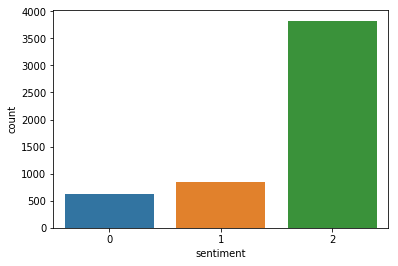

In [15]:
sns.countplot(train["sentiment"])

In [0]:
#train2 = train.drop('sentiment', axis=1)
target = train["sentiment"]

In [17]:
target.head()

0    2
1    2
2    2
3    2
4    1
Name: sentiment, dtype: int64

In [0]:
#x_train, x_val, y_train, y_val = train_test_split(train2, target, test_size=0.001, random_state=2019)

## Vectorize

In [19]:
# Convert all the text into vector form

#vec = CountVectorizer(stop_words='english', ngram_range=(1,1), analyzer='word', token_pattern=r'\w{1,}',min_df=4)
vec = CountVectorizer(stop_words='english')
#vec = TfidfVectorizer(stop_words='english', sublinear_tf=True, strip_accents='unicode', analyzer='char', token_pattern=r'\w{1,}', ngram_range=(1, 1), max_features=3000)
#vec = HashingVectorizer(n_features=20000)
X_train_counts = vec.fit_transform(train['text'])

# TF-IDF
tfidf_transformer = TfidfTransformer()
X_train_tfidf = tfidf_transformer.fit_transform(X_train_counts)
X_train_tfidf.shape

(5279, 40711)

In [0]:
#tfidf_transformer

In [0]:
# X_val_counts = vec.transform(x_val['text'])
# X_val_tfidf = tfidf_transformer.transform(X_val_counts)
# print(X_val_tfidf.shape)

In [22]:
X_test_counts = vec.transform(test['text'])
X_test_tfidf = tfidf_transformer.transform(X_test_counts)
print(X_test_tfidf.shape)

(2924, 40711)



## Different Machine Learning Models

In [0]:
#Random Forest
# from sklearn.ensemble import RandomForestClassifier
# clf_forest = RandomForestClassifier(random_state=2019,n_estimators=500).fit(X_train_tfidf, y_train)
# y_pred_rf = clf_forest.predict(X_test_tfidf)
# y_pred_rf

In [0]:
#Naive Bayes
# from sklearn.naive_bayes import MultinomialNB
# clf_nb = MultinomialNB().fit(X_train_tfidf, target)
# y_pred_nb = clf_nb.predict(X_test_tfidf)
# y_pred_nb

In [0]:
#Ada Boost
# from sklearn.ensemble import AdaBoostClassifier
# clf_abc = AdaBoostClassifier(random_state=2019,n_estimators=50, learning_rate=2).fit(X_train_tfidf, y_train)
# y_pred_abc = clf_abc.predict(X_test_tfidf)
# y_pred_abc

In [0]:
#Gradient Boosting
# from sklearn.ensemble import GradientBoostingClassifier
# clf_gbc = GradientBoostingClassifier(n_estimators=300,max_depth=5,random_state=2019).fit(X_train_tfidf, y_train)
# y_pred_gbc = clf_gbc.predict(X_test_tfidf)
# y_pred_gbc

In [0]:
#XG Boost Classifier
# from xgboost import XGBClassifier
# clf_xgb = XGBClassifier(random_state=2019, params = {'learning_rate': 0.2, 'max_depth': 9, 'n_estimators':300, 'subsample':0.6}).fit(X_train_tfidf, y_train)
# y_pred_xgb = clf_xgb.predict(X_test_tfidf)
# y_pred_xgb

In [0]:
#Logistic Regression
# from sklearn.linear_model import LogisticRegression
# clf_log = LogisticRegression(random_state=2019, C=100000).fit(X_train_tfidf, y_train)
# #clf_log = LogisticRegression(random_state=2019, solver='lbfgs', multi_class='multinomial',C=1e5).fit(X_train_tfidf, y_train)
# y_pred_log = clf_log.predict(X_test_tfidf)
# y_pred_log

In [0]:
#Ridge Classifier
# from sklearn.linear_model import RidgeClassifier
# clf_rdg = RidgeClassifier(tol=1e+2, solver="sag").fit(X_train_tfidf, y_train)
# y_pred_rdg = clf_rdg.predict(X_test_tfidf)
# y_pred_rdg


## Predict on test data

In [30]:
#KNN
from sklearn.neighbors import KNeighborsClassifier
clf_knn = KNeighborsClassifier().fit(X_train_tfidf, target)
y_pred_knn = clf_knn.predict(X_test_tfidf)
y_pred_knn

array([2, 1, 2, ..., 2, 2, 2])

In [0]:
# param_grid = dict(n_neighbors=list(range(1, 31)),weights=['uniform', 'distance'])
# print(param_grid)
# grid = GridSearchCV(clf_knn, param_grid, cv=10, scoring='accuracy')
# grid.fit(X_train_tfidf, y_train)
# print(grid.best_estimator_)
# print(grid.best_params_)
# print(grid.best_score_)

In [0]:
#accuracy_score(y_val, clf_knn.predict(X_val_tfidf))

## Submission

In [33]:
submission = {}
submission['unique_hash'] = test['unique_hash']
submission['sentiment'] = y_pred_knn
submission = pd.DataFrame(submission)
submission = submission[['unique_hash', 'sentiment']]
submission.to_csv("submisision.csv", index=False)
print(submission['sentiment'].value_counts())

2    2148
1     501
0     275
Name: sentiment, dtype: int64


In [34]:
!ls -ltr

total 18284
drwxr-xr-x 1 root root     4096 Aug  1 16:08 sample_data
-rw-r--r-- 1 root root  7283428 Aug  3 11:53 test.csv
-rw-r--r-- 1 root root 11297342 Aug  3 11:53 train.csv
-rw-r--r-- 1 root root   125754 Aug  3 13:46 submisision.csv


In [0]:
files.download('submisision.csv')